<img src="https://www.mirakl.com/_next/image?url=https%3A%2F%2Fimages.ctfassets.net%2Fg4kjd861vrk6%2F28VQ4XHuKpgvnDZAK3uUdg%2Feea1d64352f215472a4681649426a79b%2Fwhy-mirakl-about-us.png&w=640&q=100" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">📊 Analyse des Ventes - Marketplace Ameublement</h1>
<hr style="border-width:2px;border-color:#75DFC1">

## 📝 Introduction
Fichier contenant les lignes de ventes d’un site de e-commerce (marketplace) spécialisé dans l’ameublement.

### 🔹 Contexte
- Le site vend des produits de **différents vendeurs tiers** (colonne C : `Vendeur`).
- Les produits sont classés par **univers** (`Univers` - niveau 1, le plus macro) et **nature** (`Nature` - niveau 2, plus spécifique).

### 📊 Variables du dataset
| Variable | Description |
|----------|-------------|
| `Cod_cmd` | Code unique de la commande |
| `Libellé produit` | Description du produit vendu |
| `Vendeur` | Nom du vendeur tiers sur la marketplace |
| `Univers` | Catégorie principale du produit (niveau 1) |
| `Nature` | Sous-catégorie du produit (niveau 2) |
| `Date de commande` | Date à laquelle la commande a été passée |
| `Montant cmd` | Montant total de la commande en euros |
| `Quantité` | Nombre d’unités achetées dans la commande |
| `Prix transport` | Coût du transport pour la commande |
| `Délai transport annoncé` | Délai de livraison prévu en jours |

---

## 🔍 1. Visualisation des Ventes
### 🎯 Objectifs
- Créer des graphes d’**analyse globale** des ventes (overview) :
  - **Évolution temporelle** des ventes 📈
  - **Analyse par univers / nature** 📊
  - **Analyse par vendeur** 🏢
- Proposer une **maquette** de dashboard DataViz basé sur ces graphes.

### 📌 Méthodologie
- Utilisation de **matplotlib / seaborn** pour les visualisations.
- Proposition d’un design de **dashboard interactif** avec Streamlit, Power BI ou Tableau.

---

## 🤖 2. Catégorisation des Produits
### 🎯 Objectifs
- Détecter et recatégoriser **automatiquement** les lignes mal classées en utilisant la colonne `Nature` comme référence.
- Développer un **algorithme d’extraction** pour identifier :
  - **La dimension** (ex: 140x190 cm dans "Matelas mousse 140x190 cm").
  - **La couleur** si elle est mentionnée dans la description.

### 📌 Méthodologie
- Modèle de **classification supervisée** pour la recatégorisation .
- **Expressions régulières (Regex)** et NLP pour extraire dimensions et couleurs.

---

## 🛏️ 3. Analyse des Ventes & Prix des Matelas
### 🎯 Objectifs
- Analyser l’**évolution des ventes et prix** spécifiquement pour les matelas.
- Répondre à la question : **Quels facteurs influencent les ventes des matelas ?**

### 📌 Méthodologie
- Modele de regression pour capturer l'effet des variables sur les ventes.
- Analyse **corrélationnelle**.
- Visualisation avec **heatmaps et séries temporelles**.

---

## 🖥️ Présentation & Dashboarding

🚀 **Livrables attendus** :

✔️ Graphes d’analyse des ventes

✔️ Modèle de catégorisation et extraction d’attributs

✔️ Analyse détaillée des ventes et prix des matelas

✔️ Maquette de dashboard



# Import et chargement des modules

In [1]:
#Import des packages de manipulation de données
import pandas as pd 
import datetime as dt
import matplotlib.dates as mdates
import datetime
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import re

#Import packages de visualisation de données
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

# Import des bibliothèques de modélisation
import statsmodels.api as sm

# Configurer Pandas pour afficher toutes les lignes et les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Gestion des avertissements
import warnings
# Ignorer tous les avertissements
warnings.filterwarnings('ignore')

In [2]:
pip install xlrd

In [4]:
## Import de la base de données
base = pd.read_excel("C:/Users/Samadou KODON/Downloads/Sales.xlsb")

In [5]:
##Pour eviter que les dates se mettent en chiffre,nous allons les convertir

colonne_numeros_serie_excel = 'Date de commande'

In [6]:
# Conversion des numéros de série Excel en dates
base['Date de commande'] = base[colonne_numeros_serie_excel].apply(lambda excel_date: datetime.datetime(1899, 12, 30) + datetime.timedelta(days=int(excel_date)))

In [7]:
#Affichons les 10 premières observations de la base de données
base.head(10)

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0
5,182603100,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-01-23,31,1,1.67,10.0
6,182086675,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-17,86,1,16.58,10.0
7,181717709,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-11,86,1,16.58,10.0
8,181941387,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-17,60,1,1.67,10.0
9,182374701,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-21,206,2,18.25,10.0


# Analyse structurelle et extractions

In [8]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
base.info()

# Analyse de la dimension de la base de données
print("\nForme du DataFrame:")
print(base.shape) 

#Analyse des données manquantes
print("\nValeurs manquantes par colonne:")
print(base.isnull().sum())

#Analyse des valeurs uniques
print("\nNombre de valeurs uniques par colonne:")
print(base.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525034 entries, 0 to 525033
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Cod_cmd                  525034 non-null  int64         
 1   Libellé produit          525034 non-null  object        
 2   Vendeur                  525034 non-null  object        
 3   Univers                  507347 non-null  object        
 4   Nature                   513289 non-null  object        
 5   Date de commande         525034 non-null  datetime64[ns]
 6   Montant cmd              525034 non-null  int64         
 7   Quantité                 525034 non-null  int64         
 8   Prix transport           525034 non-null  float64       
 9   Délai transport annoncé  285611 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 40.1+ MB

Forme du DataFrame:
(525034, 1

Nos variables sont dans de bon format. 

In [9]:
#afficher le nombre d'obersvation par variabes
base.count()

Cod_cmd                    525034
Libellé produit            525034
Vendeur                    525034
Univers                    507347
Nature                     513289
Date de commande           525034
Montant cmd                525034
Quantité                   525034
Prix transport             525034
Délai transport annoncé    285611
dtype: int64

# Qualité des données : détection et traitemenent des anomalies

Verification du type d'anomalies dans notre jeu de données :
-Données manquantes
-Données incohérentes

# Traitement des données manquantes

## Imputation de données

Dans un premier temps, nous imputons par la médiane la variable "delai transport annoncé" car cet indicateur statistique est insensible aux valeurs exrêmes. 

In [10]:
## D'abord renommons la Délai transport annoncé en DelaitTA

In [11]:
base = base.rename(columns={'Délai transport annoncé': 'DelaitTA'})

In [12]:
base.DelaitTA.fillna(base.DelaitTA.median(),inplace=True)

Dans un sécond temps, nous imputons les données manquantes dans la colonne "Nature" à l'aide de chaque Nature inclus dans la description des produit (libélle produit). Globalement l'algorithme parcourt chaque ligne du DataFrame, et pour les lignes où la colonne 'Nature' est vide ou nulle, il remplit cette colonne avec la valeur de la colonne 'Libellé produit' 

In [13]:
# Implémentation de l'algorithme
for index, row in base.iterrows():
    if pd.isnull(row['Nature']) or row['Nature'] == '':
        base.at[index, 'Nature'] = row['Libellé produit']

In [14]:
base.isnull().sum() ## verification dans données manquantes dans la colonne Nature

Cod_cmd                 0
Libellé produit         0
Vendeur                 0
Univers             17687
Nature                  0
Date de commande        0
Montant cmd             0
Quantité                0
Prix transport          0
DelaitTA                0
dtype: int64

Il n'existe plus de données de manquantes dans la colonne "Nature". 

In [15]:
## Imputons maintenant la colonne Univers

**Cas 1**

In [16]:
base.Univers.fillna(base.Univers.mode()[0], inplace=True) ## Impuattion par le mode 

**Cas 2**

Dans le cadre de cette étude , nous avons choisis le cas 1 

In [17]:
base.isnull().sum() ## On verifie encore les données manquantes. 

Cod_cmd             0
Libellé produit     0
Vendeur             0
Univers             0
Nature              0
Date de commande    0
Montant cmd         0
Quantité            0
Prix transport      0
DelaitTA            0
dtype: int64

Notre jeu de données est nettoyé et est prêt à être explorer | Analyser 

**EXPORTATION APRES NETTOYAGE**

In [18]:
base.to_csv('E_commerce0.csv', index=False)

# Chargement de la base de données nettoyée

In [19]:
base1 = pd.read_csv('E_commerce0.csv') ## Import de la nouvelle base de données


In [20]:
base1.head() ## Affichons les premières lignes de base 1

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,DelaitTA
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0


In [21]:
## Analyse de la structure

In [22]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
base1.info()

# Analyse de la dimension de la base de données
print("\nForme du DataFrame:")
print(base1.shape) 

#Analyse des données manquantes
print("\nValeurs manquantes par colonne:")
print(base1.isnull().sum())

#Analyse des valeurs uniques
print("\nNombre de valeurs uniques par colonne:")
print(base1.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525034 entries, 0 to 525033
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Cod_cmd           525034 non-null  int64  
 1   Libellé produit   525034 non-null  object 
 2   Vendeur           525034 non-null  object 
 3   Univers           525034 non-null  object 
 4   Nature            525034 non-null  object 
 5   Date de commande  525034 non-null  object 
 6   Montant cmd       525034 non-null  int64  
 7   Quantité          525034 non-null  int64  
 8   Prix transport    525034 non-null  float64
 9   DelaitTA          525034 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 40.1+ MB

Forme du DataFrame:
(525034, 10)

Valeurs manquantes par colonne:
Cod_cmd             0
Libellé produit     0
Vendeur             0
Univers             0
Nature              0
Date de commande    0
Montant cmd        

In [23]:
base1.isnull().sum() ## Affichons les données manquantes

Cod_cmd             0
Libellé produit     0
Vendeur             0
Univers             0
Nature              0
Date de commande    0
Montant cmd         0
Quantité            0
Prix transport      0
DelaitTA            0
dtype: int64

# 🔍 1. Visualisation des Ventes

### 🎯 Objectifs
- Créer des graphes d’**analyse globale** des ventes (overview) :
  - **Évolution temporelle** des ventes 📈
  - **Analyse par univers / nature** 📊
  - **Analyse par vendeur** 🏢
- Proposer une **maquette** de dashboard DataViz basé sur ces graphes.

#  a- Evolution temporelle des ventes

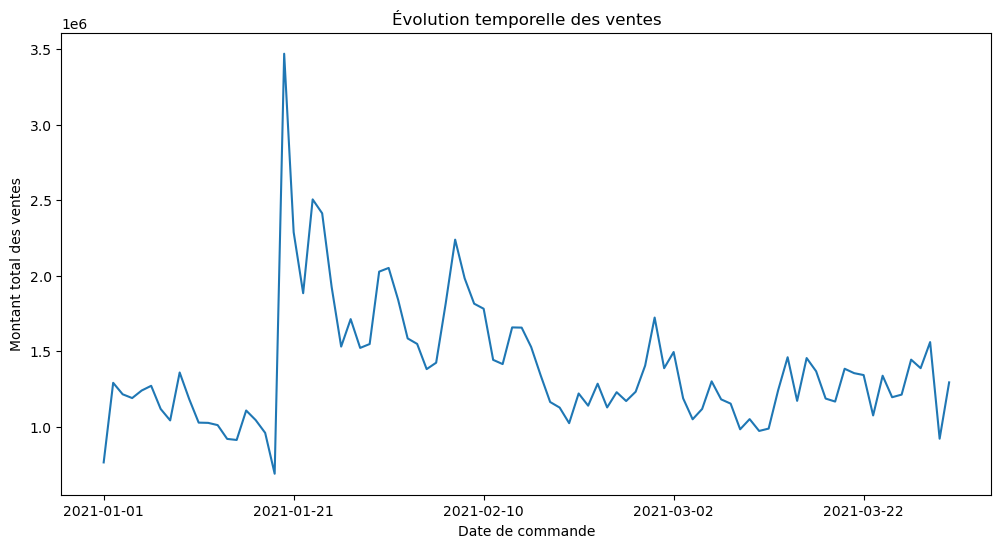

In [24]:
# Graphique montrant l'évolution temporelle des ventes
plt.figure(figsize=(12, 6))
base1.groupby('Date de commande')['Montant cmd'].sum().plot()
plt.title('Évolution temporelle des ventes')
plt.xlabel('Date de commande')
plt.ylabel('Montant total des ventes')
plt.show()

**Quelques points saillants**:

- Il y a un pic très significatif aux alentours du 10 janvier 2021 où les ventes ont atteint un niveau qui est bien au-dessus de la moyenne. 
- À partir de fin février jusqu'à fin mars, il semble y avoir une légère tendance à la baisse en termes de valeur des ventes.

**Interpretation**:

Les pic pourraient représenter une période de forte demande, comme une saison de vacances, les journées de black friday, ou un lancement de produit, une habitudes d'achat des clients ou la réception de stocks importants à certaines dates clés.


# b- Analyse par univers

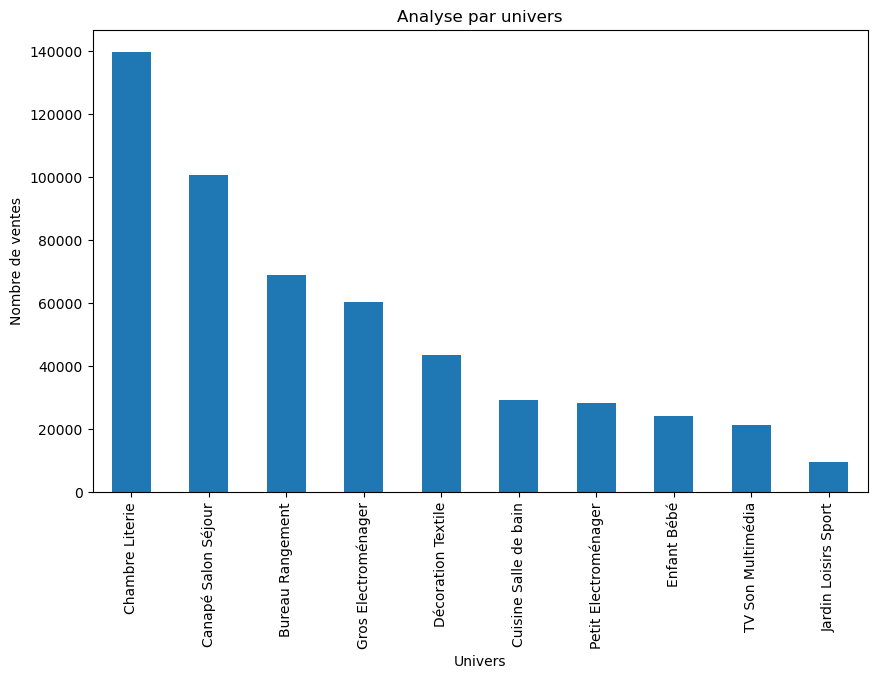

In [25]:
# Analyse par univers
plt.figure(figsize=(10, 6))
base1['Univers'].value_counts().plot(kind='bar')
plt.title('Analyse par univers')
plt.xlabel('Univers')
plt.ylabel('Nombre de ventes')
plt.show()

**Quelques points saillants**:

- D'après le graphique , il semble y avoir une concentration des ventes dans certaines catégories (telles que la literie et les meubles de salon), ce qui pourrait indiquer des domaines d'intérêt élevé ou des périodes de promotions pour ces articles.

**Proposition**
- Les catégories avec moins de ventes pourraient représenter des opportunités pour l'entreprise de développer sa présence ou d'améliorer ses stratégies de vente et marketing pour ces univers.

# Analyse approfondie des Top 5 _Univers

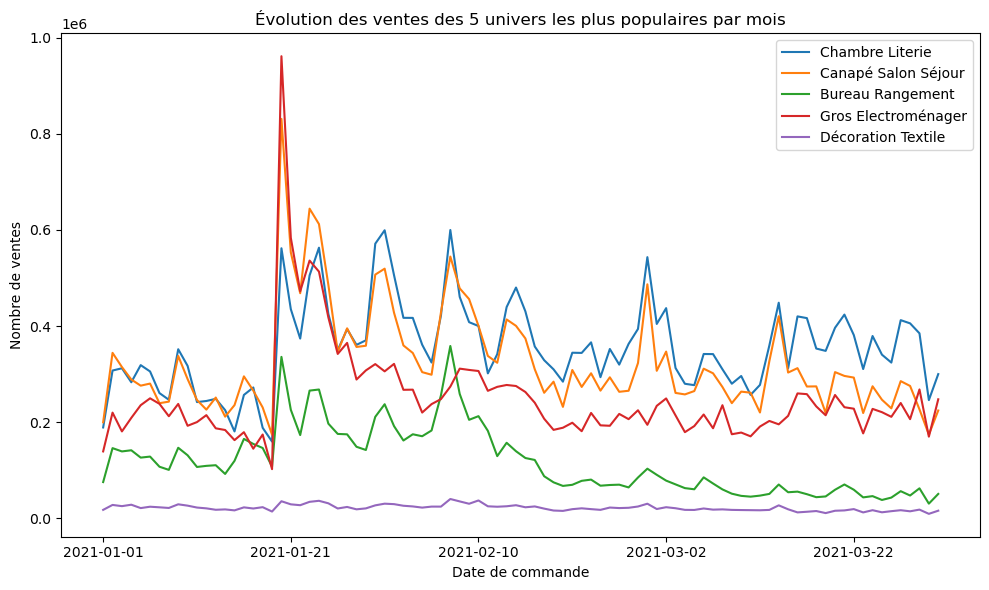

In [26]:
# Nous allons filtrer et ne garder que les 5 univers les plus populaires.

# Sélections des 5 univers les plus populaires
top_univers = base1['Univers'].value_counts().nlargest(5).index

# Filtrons le DataFrame pour ne garder que les lignes appartenant aux 5 univers les plus populaires
top_data = base1[base1['Univers'].isin(top_univers)]

# Créons un graphique linéaire pour chaque univers
plt.figure(figsize=(10, 6))

for univers in top_univers:
    subset = top_data[top_data['Univers'] == univers]
    subset.groupby('Date de commande')['Montant cmd'].sum().plot(label=univers)

plt.title('Évolution des ventes des 5 univers les plus populaires par mois')
plt.xlabel('Date de commande')
plt.ylabel('Nombre de ventes')
plt.legend()
plt.tight_layout()
plt.show()


**Quelques points sailllants**: 

- Chaque univers montre des pics et des creux distincts, avec le pic le plus significatif pour le "Canapé Salon Séjour" en janvier, atteignant près de 1 million de ventes

**Tendance par Univers**:

- Chambre Literie : Les ventes sont relativement stables par rapport aux autres catégories, avec des pics légèrement plus marqués vers la fin de chaque mois.

- Canapé Salon Séjour : Ce secteur montre un pic très élevé en janvier suivi d'une chute brutale, ce qui pourrait indiquer probablement une promotion spéciale ou un événement saisonnier.

- Bureau Rangement : Les ventes sont également assez stables avec des fluctuations modérées.

- Gros Électroménager : On observe une tendance à la hausse des ventes en février, peut-être due à des promotions ou à une demande saisonnière

- Décoration Textile : Ce secteur présente les chiffres de ventes les plus bas et reste assez constant sur les trois mois.



**Interprétation et Analyse**:

- La comparaison des différents univers montre que certains produits sont plus affectés par des fluctuations saisonnières ou des événements spécifiques (comme les promotions) que d'autres.

- La demande pour des articles de "Canapé Salon Séjour" et "Gros Électroménager" pourrait être influencée par des périodes spécifiques, par exemple, les soldes de janvier ou l'achat d'appareils électroménagers à la suite de la réception des primes de fin d'année.

- La stabilité des ventes dans la catégorie "Chambre Literie" suggère une demande constante, tandis que la faible performance de "Décoration Textile" pourrait indiquer un besoin d'examens de stratégie de marché ou d'offres produit.

# c- Analyse par nature

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Analyse par nature
from wordcloud import WordCloud

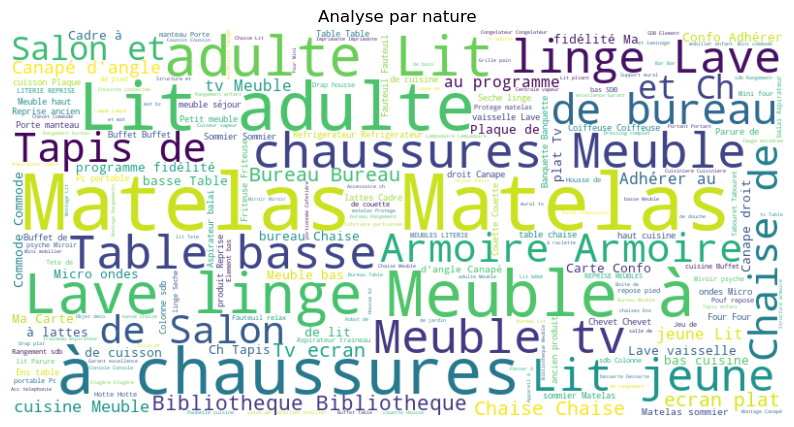

In [29]:
# Créer une chaîne de texte avec les valeurs de la colonne 'Nature'
text = ' '.join(base1['Nature'])

# Générer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Analyse par nature')
plt.show()

Dans ce nuage de mots, ils apparaissent en fonction de leur fréquence dans la colonne "Nature". Les mots les plus fréquents apparaissent plus gros, tandis que les mots moins fréquents apparaissent plus petits. C'est un moyen visuel de comprendre quelles catégories de nature sont les plus fréquentes dans notre jeu de données, sans avoir à parcourir une liste de valeurs. Cela nous à aider à identifier les tendances et les catégories prédominantes dans notre jeu de données.

## Analyse par nature: Les TOP20 Par Nature

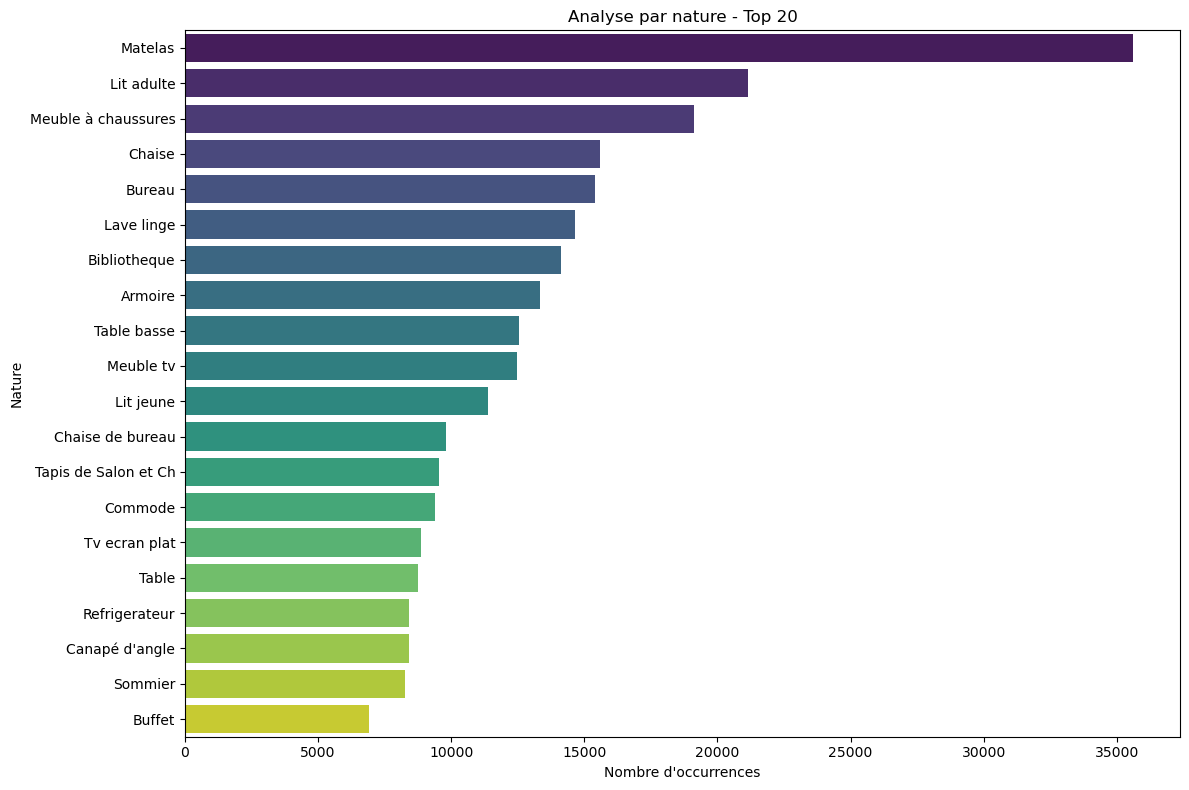

In [30]:
# Visualisons les 20 catégories les plus fréquentes
nature_counts = base1['Nature'].value_counts()
top_n = 20
top_natures = nature_counts.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_natures.index, x=top_natures.values, palette='viridis')
plt.title('Analyse par nature - Top 20')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Nature')
plt.tight_layout()
plt.show()

**Quelques points saillants** :

- Matelas arrive en tête de liste, indiquant qu'il s'agit du produit le plus vendu parmi ceux répertoriés. En suite, vient, le Lit adulte et Meuble à chaussures, suggérant un intérêt élevé pour les produits liés à la chambre à coucher et au rangement.
- Tv ecran plat" ne soit pas le produit le plus vendu. Il figure en bas de la liste des 20 premiers, indiquant qu'il est moins vendu que Matelas et les autres articles de meuble qui le précèdent.

**Interpretation et Analyse**: 

- L'intérêt marqué pour les Matelas et Lit adulte pourrait indiquer une forte demande dans le secteur de la literie, peut-être en raison de nouvelles tendances de décoration, d'un accent accru sur le confort du sommeil ou d'un cycle de remplacement régulier.

- La diversité des catégories reflétées dans le top 20 suggère que les consommateurs investissent dans un large éventail d'ameublement pour leurs espaces de vie et de travail.


# d- Analyse par vendeur

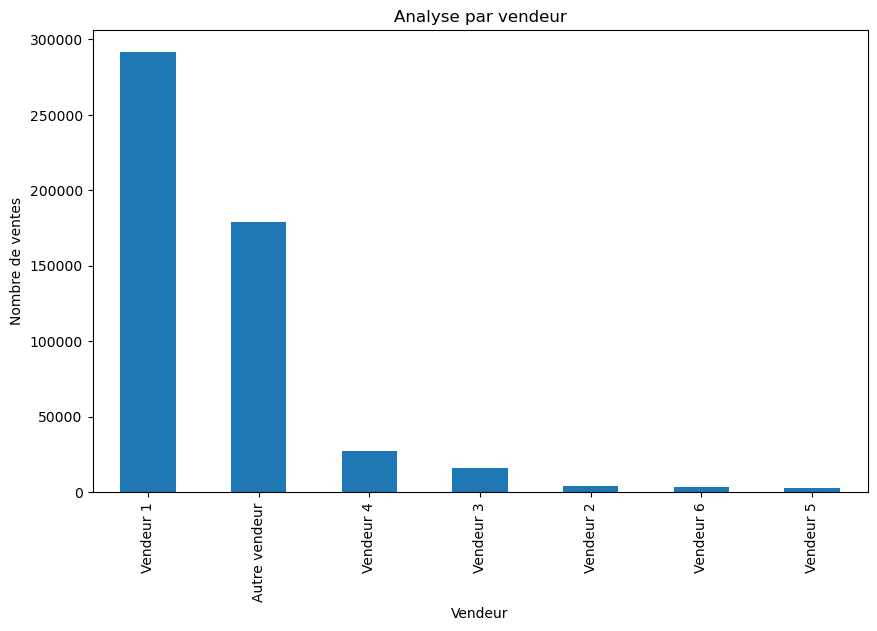

In [31]:
# Analyse par vendeur
plt.figure(figsize=(10, 6))
base1['Vendeur'].value_counts().plot(kind='bar')
plt.title('Analyse par vendeur')
plt.xlabel('Vendeur')
plt.ylabel('Nombre de ventes')
plt.show()

**Quelques Points saillants**:

- Il y a une disparité significative entre les ventes réalisées par différents vendeurs. En effet, le Vendeur 1 se démarque avec le plus grand nombre de ventes, dépassant largement les autres.

- Il y a une catégorie nommée "Autre Vendeur", qui représente vraisemblablement la somme des ventes réalisées par des vendeurs non listés individuellement. Cette catégorie se situe en deuxième position, ce qui suggère que les ventes cumulées de ces vendeurs non spécifiés sont significatives.

- Vendeurs avec Moins de Ventes : Les Vendeurs 2, 3, 4, 5, et 6 affichent tous des nombres de ventes inférieurs, avec les Vendeurs 2 et 5 ayant les chiffres les plus faibles parmi ceux-ci.

**Interprétation et Analyse** :

- Le Vendeur 1 pourrait avoir de meilleures stratégies de vente, une plus grande clientèle, ou une meilleure zone de vente qui contribue à sa performance élevée.

- Les "Autres Vendeurs", bien que pas assez forts individuellement pour surpasser le Vendeur 1, ont collectivement une performance remarquable, indiquant une contribution importante au volume total des ventes.

- La distribution des ventes suggère que quelques vendeurs clés génèrent la majorité des ventes, tandis que d'autres contribuent de manière plus modeste

**Remarque**:
- Les vendeurs avec des performances inférieures pourraient bénéficier de formations supplémentaires, de soutien en matière de marketing ou de révision de leurs territoires ou stratégies de vente.

**Proposition**:
- La direction pourrait envisager d'approfondir l'analyse des raisons de la réussite du Vendeur 1 pour identifier les meilleures pratiques qui pourraient être partagées avec d'autres vendeurs.

- Un système de récompenses basé sur les performances pourrait être mis en place pour encourager les vendeurs à augmenter leurs chiffres de vente.


# e- Tableau de bord des ventes. 

<Figure size 640x480 with 0 Axes>

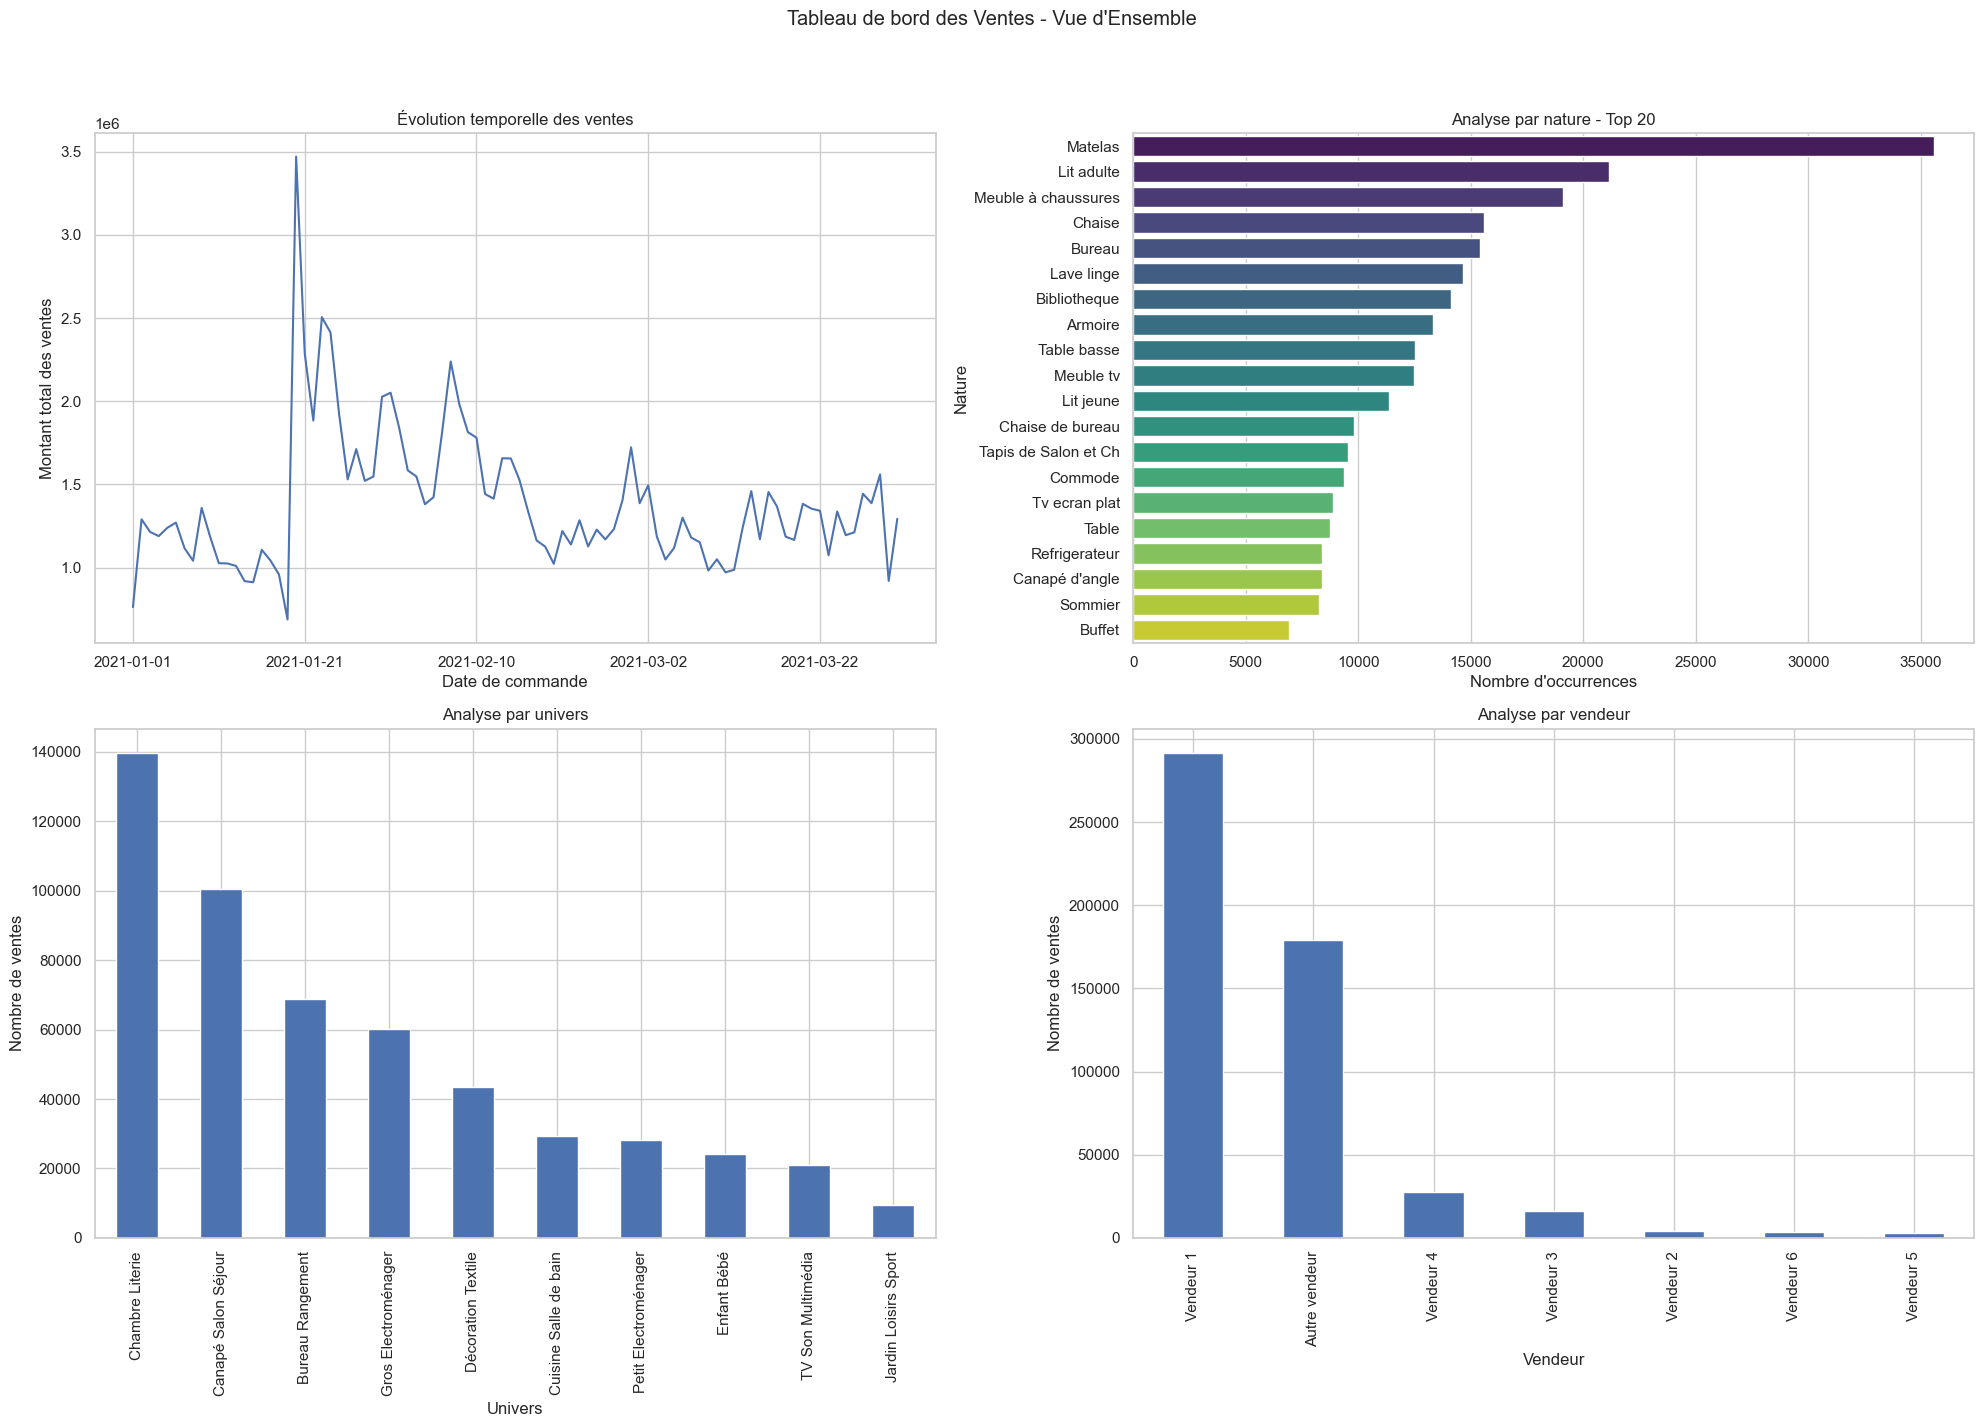

In [32]:
# Configuration la figure du dashboard

plt.subplots_adjust(hspace=0.3, wspace=0.2)
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Tableau de bord des Ventes - Vue d\'Ensemble')

# Graphique 1: Évolution Temporelle des Ventes
base1.groupby('Date de commande')['Montant cmd'].sum().plot(ax=axes[0, 0])
axes[0, 0].set_title('Évolution temporelle des ventes')
axes[0, 0].set_xlabel('Date de commande')
axes[0, 0].set_ylabel('Montant total des ventes')

# Graphique 2: Analyse par Nature - Top 20
nature_counts = base1['Nature'].value_counts().head(20)
sns.barplot(y=nature_counts.index, x=nature_counts.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Analyse par nature - Top 20')
axes[0, 1].set_xlabel('Nombre d\'occurrences')
axes[0, 1].set_ylabel('Nature')

# Graphique 3: Analyse par Univers
base1['Univers'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Analyse par univers')
axes[1, 0].set_xlabel('Univers')
axes[1, 0].set_ylabel('Nombre de ventes')

# Graphique 4: Analyse par Vendeur
base1['Vendeur'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Analyse par vendeur')
axes[1, 1].set_xlabel('Vendeur')
axes[1, 1].set_ylabel('Nombre de ventes')

# Ajustement de la mise en page
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Affichez le dashboard
plt.show()

# ## 🤖 2. Catégorisation des Produits2- Catégorisation

### 🎯 Objectifs
- Détecter et recatégoriser **automatiquement** les lignes mal classées en utilisant la colonne `Nature` comme référence.
- Développer un **algorithme d’extraction** pour identifier :
  - **La dimension** (ex: 140x190 cm dans "Matelas mousse 140x190 cm").
  - **La couleur** si elle est mentionnée dans la description.


## Tri  de données

### Affichage des lignes mal categorisées

In [33]:
def est_mal_categorisee(row):
    Nature = str(row['Nature']).lower()
    produit = str(row['Libellé produit']).lower()
    
    # Vérifier si la nature est dans la description du produit
    if Nature in produit:  # Utilisez 'produit' ici
        return False  # Bien catégorisée
    else:
        return True   # Mal catégorisée

Cette fonction est utilisée pour parcourir notre base et déterminer si chaque produit est correctement catégorisé, en se basant sur si le nom de la catégorie est mentionné dans la description du produit.

In [34]:
# Appliquer la fonction à chaque ligne
base1['mal_categorisee'] = base1.apply(est_mal_categorisee, axis=1)

# Filtrer pour obtenir seulement les lignes mal catégorisées
lignes_mal_categorisees = base1[base1['mal_categorisee']]


In [35]:
lignes_mal_categorisees.head(10)

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,DelaitTA,mal_categorisee
11,182074852,tagère à double position tania bois imitation...,Autre vendeur,Bureau Rangement,Bibliotheque,2021-01-17,79,1,16.58,10.0,True
12,182056932,tagère à double position tania bois imitation...,Autre vendeur,Bureau Rangement,Bibliotheque,2021-01-17,79,1,16.58,10.0,True
15,181586231,Console vintage leoni motifs graphiques,Autre vendeur,Bureau Rangement,Bureau,2021-01-09,90,1,27.42,10.0,True
19,182083368,Banc d entrée capitonné en bambou tissu gris f...,Autre vendeur,Chambre Literie,Banc de lit,2021-01-17,29,1,6.66,10.0,True
20,182109464,Banc d entrée capitonné en bambou tissu gris f...,Autre vendeur,Chambre Literie,Banc de lit,2021-01-18,80,2,8.32,10.0,True
21,181961372,Banc d entrée capitonné en bambou tissu gris f...,Autre vendeur,Chambre Literie,Banc de lit,2021-01-18,29,1,6.66,10.0,True
27,181916701,Bibliothèque vintage noemi bois pied épingle,Autre vendeur,Bureau Rangement,Bibliotheque,2021-01-14,75,1,1.67,10.0,True
37,182440445,tagère à double position tania bois blanc l 1...,Autre vendeur,Bureau Rangement,Bibliotheque,2021-01-23,79,1,16.58,10.0,True
38,183072450,tagère à double position tania bois blanc l 1...,Autre vendeur,Bureau Rangement,Bibliotheque,2021-01-29,79,1,16.58,10.0,True
41,182077852,Lot de 3 étagères murales grises,Autre vendeur,Bureau Rangement,Bibliotheque,2021-01-17,26,1,18.25,10.0,True


# Afficher les lignes bien categorisées

In [36]:
lignes_bien_categorisees = base1[~base1['mal_categorisee']]

In [37]:
lignes_bien_categorisees.head(10)

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,DelaitTA,mal_categorisee
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0,False
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0,False
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0,False
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0,False
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0,False
5,182603100,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-01-23,31,1,1.67,10.0,False
6,182086675,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-17,86,1,16.58,10.0,False
7,181717709,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-11,86,1,16.58,10.0,False
8,181941387,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-17,60,1,1.67,10.0,False
9,182374701,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-21,206,2,18.25,10.0,False


A l'aide des lignes mal categorisées , nous deduisons les lignes bien categorisées. 

In [38]:
# Suppression de la colonne "mal categorisée"
base1 = base1.drop('mal_categorisee', axis=1)

## 2.1  Algo pour bien categoriser toutes les lignes

In [39]:
##Affichons d'abord la liste des élémént dans la variables Nature
base.Nature.unique()

array(['Table basse', 'Peluche', 'Chaise', 'Meuble tv',
       'Meuble à chaussures', 'Bibliotheque', 'Table', 'Bureau',
       'Banc de lit', 'Panneau', 'Chevet', 'Commode', 'Vitrine',
       'Canape droit', 'Fauteuil', 'Cuisine complète',
       'Meuble bas cuisine', 'Microphone', 'Vestiaire', 'Surmatelas',
       'Coffre', 'Accessoire wc', 'Console', 'Tabouret',
       'Housse de couette', 'Buffet', 'Tente de lit', 'Structure armoire',
       'Coiffeuse', 'Etagère', 'Rangement sdb', 'Poubelle cuisine',
       'Buffet de cuisine', 'Penderie', 'Porte manteau',
       'Element bas SDB', 'Petit meuble séjour', 'Rangement bureau',
       'Portant', 'Chaise de bureau', 'Pouf / repose pied',
       'Miroir psyche', 'Dressing complet', 'Fauteuil relax',
       'Tete de lit', 'Aspirateur robot', 'Acc telephonie', 'Rideau',
       'Rideau de douche', 'Taie de traversin', 'Drap housse',
       "Linge d'office", 'Poubelle sdb', 'Plaid', 'Voilage',
       'Panier à linge', 'Cadre photo', 'Lampe'

In [ ]:
# Obtenons les natures uniques
natures_possibles = [str(nature).lower() for nature in base1['Nature'].unique()]

# Fonction pour vérifier et corriger la catégorisation de chaque produit
def bien_categoriser(row):
    produit_mots = str(row['Libellé produit']).lower().split()  # Diviser le produit en mots
    nature_actuelle = row['Nature'].lower()
    nature_mots = nature_actuelle.split()

    # Vérifions si la nature actuelle correspond à des mots dans le libellé produit
    if all(mot in produit_mots for mot in nature_mots):
        return nature_actuelle.capitalize()  # S"il y'a correspondance, ne rien changer

    # Si la nature actuelle ne correspond pas, chercher une autre nature existante
    for nature in natures_possibles:
        nature_mots = nature.split()
        if all(mot in produit_mots for mot in nature_mots):
            return nature.capitalize()  # S'il y'a correspondance, utiliser cette nature

    # Si aucune nature ne correspond, conserver la nature originale
    return nature_actuelle.capitalize()

# Appliquer la fonction à chaque ligne de notre DataFrame
base1['Nature'] = base1.apply(bien_categoriser, axis=1)

**Globalement**:

- L'algo parcourt chaque ligne de notre DataFrame.
- Pour chaque "Libellé produit", il vérifie si une "Nature" existante est présente.
- Si une "Nature" est trouvée, elle laisse la ligne telle quelle.
- Si aucune "Nature" n’est trouvée, il cherche un mot dans le "Libellé produit" qui est une "Nature" existante et attribue cette "Nature" à la ligne.
- Si aucun mot du "Libellé produit" n'est une "Nature" existante, il conserve la "Nature" originale de la ligne.

# Calculer le pourcentage de produits mal classés après la correction

In [99]:
# Avant la correction
total_produits = len(base1)
mal_classés_avant = len(lignes_mal_categorisees)
pourcentage_mal_classés_avant = (mal_classés_avant / total_produits) * 100
print(f"Avant : {pourcentage_mal_classés_avant:.2f}% des produits étaient mal classés.")

# Après la correction
base1['mal_categorisee_apres'] = base1.apply(est_mal_categorisee, axis=1)
mal_classés_apres = len(base1[base1['mal_categorisee_apres']])
pourcentage_mal_classés_apres = (mal_classés_apres / total_produits) * 100
print(f"Après : {pourcentage_mal_classés_apres:.2f}% des produits sont mal classés.")

# Amélioration
amelioration = pourcentage_mal_classés_avant - pourcentage_mal_classés_apres
print(f"Amélioration : {amelioration:.2f}% de réduction des erreurs de catégorisation.")

Avant : 42.91% des produits étaient mal classés.
Après : 27.04% des produits sont mal classés.
Amélioration : 15.87% de réduction des erreurs de catégorisation.


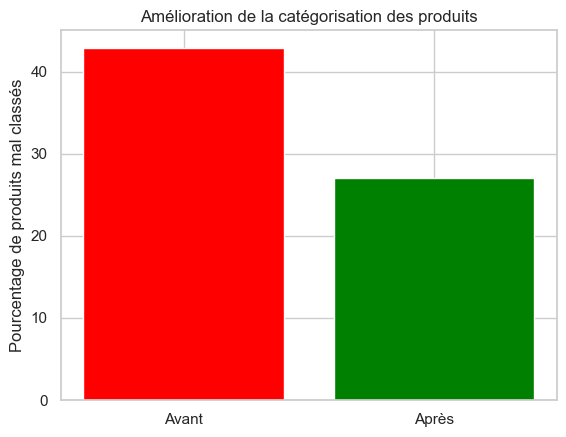

In [101]:
# Données
labels = ['Avant', 'Après']
pourcentages = [pourcentage_mal_classés_avant, pourcentage_mal_classés_apres]

# Graphique
plt.bar(labels, pourcentages, color=['red', 'green'])
plt.ylabel('Pourcentage de produits mal classés')
plt.title('Amélioration de la catégorisation des produits')
plt.show()

In [41]:
# Sauvegardons notre dataset recategoriseé
base1.to_csv('C:/Users/Samadou KODON/Downloads/New_data0.csv', index=False)

## 2.2 Extraction des dimensions

Regex

In [ ]:
# Fonction pour extraire la dimension
def extraire_dimension(description):
    # schema regex pour détecter les dimensions, avec ou sans espaces autour de 'x' ou '*' et pouvant avoir un troisième ensemble de chiffres
    motif_dimension = r'\b(\d+\s*[xX*]\s*\d+(?:\s*[xX*]\s*\d+)?\s*(cm|mm|in)?)\b'
    match = re.search(motif_dimension, description)
    if match:
        # Retournons la dimension trouvée en supprimant les espaces et en normalisant le séparateur
        dimension = re.sub(r'\s+', '', match.group())  # Enlèvons les espaces s'ils existent
        dimension = re.sub(r'[xX*]', 'x', dimension)  # Remplaçons '*' ou 'X' par 'x' pour standardiser
        return dimension
    return None  # Retournons None si aucune dimension n'est trouvée

# Appliquons la fonction pour extraire la dimension à chaque description de produit
base1['Dimension'] = base1['Libellé produit'].apply(lambda desc: extraire_dimension(desc.lower()))

In [43]:
#base1.head(50)

# 2.2.1 Extraction des couleurs

Utiliser regex et eliminer les stopwords

In [ ]:
base1[100:] ## Affihons un extrait de la base de données

In [ ]:
import re
import pandas as pd

# Liste exhaustive de couleurs (en français et en anglais)
couleurs_liste = [
    "rouge", "vert", "bleu", "bleue", "noir", "noire", "blanc", "blanche", 
    "jaune", "gris", "rose", "violet", "orange", "marron", "beige", "cyan", 
    "magenta", "turquoise", "ivoire", "argent", "or", "pourpre", "corail", 
    "olive", "saumon", "kaki", "indigo", "lavande", "grenat", "bordeaux", 
    "chocolat", "crème", "menthe", "pêche", "abricot", "mauve", "ocre", 
    "rouge sang", "bleu ciel", "vert pomme", "gris foncé", "gris clair", 
    "noir profond", "blanc cassé", "blanc nacré", "rouge brique", "bleu marine", 
    "vert émeraude", "jaune citron", "rose poudré", "violet profond", 
    "orange brûlé", "marron clair", "beige clair", "cyan clair", 
    "magenta foncé", "turquoise clair", "ivoire foncé", "argent métallisé", 
    "or brillant", "pourpre royal", "corail clair", "olive foncé", 
    "saumon fumé", "kaki clair", "indigo foncé", "lavande claire", 
    "grenat profond", "bordeaux foncé", "chocolat au lait", "crème fraîche", 
    "menthe fraîche", "pêche mûre", "abricot doré", "mauve pastel", 
    "ocre rouge", "rouge cerise", "bleu azur", "vert anis", "gris perle", 
    "noir mat", "blanc pur", "blanc éclatant"
]

# Fonction pour extraire les couleurs
def extraire_couleur(description):
    # Convertir la description en minuscules pour une correspondance insensible à la casse
    description = description.lower()
    
    # Trouver toutes les couleurs correspondantes dans la description
    couleurs_trouvees = [couleur for couleur in couleurs_liste if re.search(r'\b' + re.escape(couleur) + r'\b', description)]
    
    # Retourner les couleurs trouvées ou None si aucune n'est trouvée
    return ', '.join(couleurs_trouvees) if couleurs_trouvees else None


# Appliquer cette fonction pour extraire les couleurs à chaque description de produit
base1['Couleurs'] = base1['Libellé produit'].apply(lambda desc: extraire_couleur(desc.lower()))

In [61]:
base1.head(10)

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,DelaitTA,Dimension,Couleurs
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0,None,None
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0,None,None
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0,None,blanc
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0,None,None
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0,None,"blanc, gris"
5,182603100,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-01-23,31,1,1.67,10.0,None,"blanc, gris"
6,182086675,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-17,86,1,16.58,10.0,None,None
7,181717709,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-11,86,1,16.58,10.0,None,None
8,181941387,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-17,60,1,1.67,10.0,None,gris
9,182374701,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,2021-01-21,206,2,18.25,10.0,None,gris


# ENREGISTREMENT DU TRAVAIL 

In [ ]:
pip install openpyxl

In [ ]:
# Enregistrons notre DataFrame au format Excel
## Export via XLSX
#base1.to_excel(r'C:/Users/Samadou KODON/Downloads/Export_final.xlsx', index=False, engine='openpyxl')

# 3. Analyse ventes & prix matelas

## Tri des données de Metelas

In [62]:
#Extraction de "Matelas" dans la liste des Nature possibles
BM =base1[base1['Nature']=='Matelas']

In [63]:
BM.head(10)

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,DelaitTA,Dimension,Couleurs
344,181982876,Matelas Cosy 90x190cm 20 cm d épaisseur Mémoir...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,157,1,0.00,12.0,90x190cm,None
352,181986659,Matelas Atlanta 90x200 cm Ep 20cm Mémoire de f...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,176,1,0.00,12.0,90x200cm,None
385,182277093,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,494,1,0.00,7.0,140x190cm,None
386,182589961,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,2021-01-23,494,1,0.00,7.0,140x190cm,None
387,182270271,Matelas latexlite 90x190 cm latex haute densit...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,232,1,0.00,7.0,90x190cm,None
412,182716311,Matelas h 4+ hotel 140x190 cm 17 cm mémoire de...,Autre vendeur,Chambre Literie,Matelas,2021-01-24,279,1,13.25,12.0,140x190cm,None
425,181998010,Matelas h 4 palace 140x200 cm 27 cm mémoire de...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,513,1,13.25,12.0,140x200cm,None
441,182281125,Matelas latexlite 90x190 cm latex haute densit...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,494,2,0.00,7.0,90x190cm,None
442,182613730,Matelas essentiel 160x200 cm système ergonomiq...,Autre vendeur,Chambre Literie,Matelas,2021-01-24,228,1,0.00,7.0,160x200cm,None
462,182162394,Matelas essentiel 160x200 cm système ergonomiq...,Autre vendeur,Chambre Literie,Matelas,2021-01-19,228,1,0.00,7.0,160x200cm,None


In [66]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
BM.info()

# Afficher la forme ou la dimension du DataFrame
print("\nForme du DataFrame:")
print(BM.shape)

print("\nValeurs manquantes par colonne:")
print(BM.isnull().sum())

print("\nNombre de valeurs uniques par colonne:")
print(BM.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49489 entries, 344 to 525017
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cod_cmd           49489 non-null  int64  
 1   Libellé produit   49489 non-null  object 
 2   Vendeur           49489 non-null  object 
 3   Univers           49489 non-null  object 
 4   Nature            49489 non-null  object 
 5   Date de commande  49489 non-null  object 
 6   Montant cmd       49489 non-null  int64  
 7   Quantité          49489 non-null  int64  
 8   Prix transport    49489 non-null  float64
 9   DelaitTA          49489 non-null  float64
 10  Dimension         48720 non-null  object 
 11  Couleurs          1130 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.9+ MB

Forme du DataFrame:
(49489, 12)

Valeurs manquantes par colonne:
Cod_cmd                 0
Libellé produit         0
Vendeur           

### Analyse  et segmentation des ventes de Matelas

In [67]:
# Convertir 'Date de commande' en datetime 
BM['Date de commande'] = pd.to_datetime(BM['Date de commande'])

###Segmentation du montant des commandes par periode
ventes_par_date = BM.groupby(BM['Date de commande'].dt.date).agg({
    'Quantité': 'sum', 
    'Montant cmd': 'sum'
}).reset_index()

##### Representons l'évolution des ventes de matelas

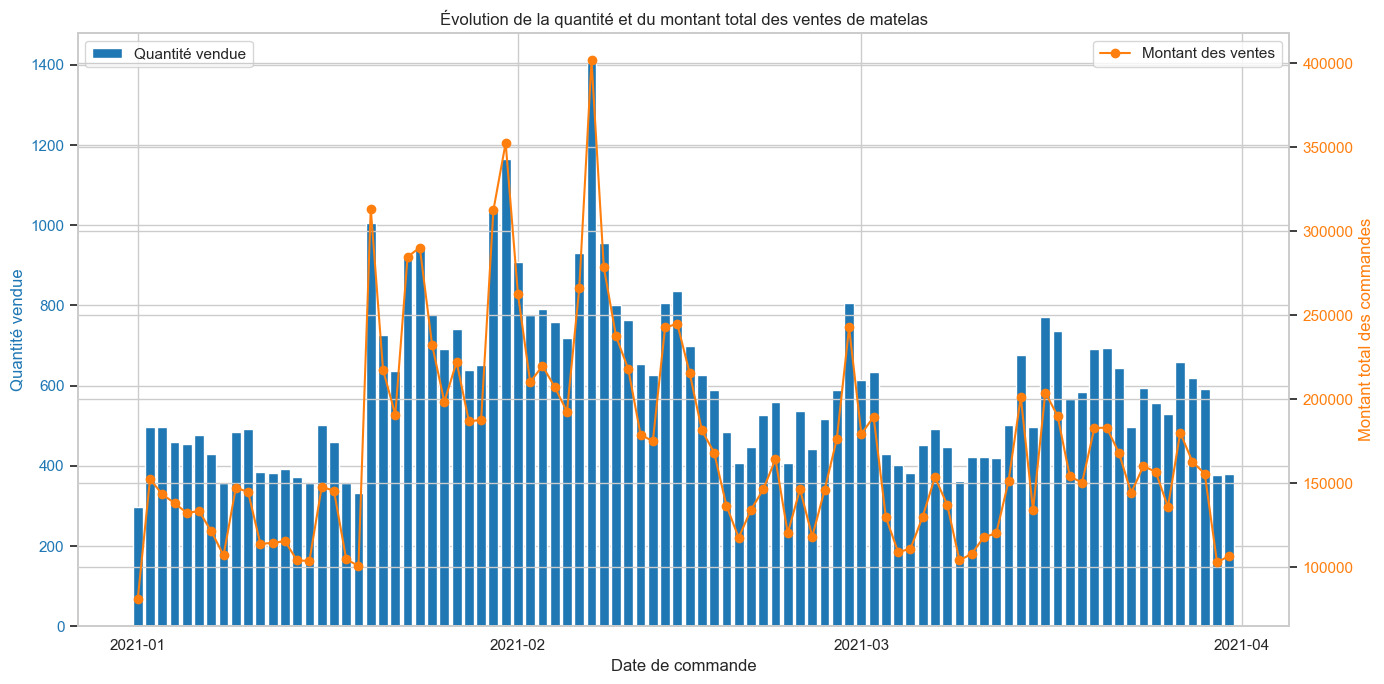

In [68]:
# Configuration la figure et les axes pour la visualisation
fig, ax1 = plt.subplots(figsize=(14, 7))

# Configuration la couleur et l'axe pour la quantité vendue
color_quantite = 'tab:blue'
ax1.set_xlabel('Date de commande')
ax1.set_ylabel('Quantité vendue', color=color_quantite)
ax1.bar(ventes_par_date['Date de commande'], ventes_par_date['Quantité'], color=color_quantite, label='Quantité vendue')
ax1.tick_params(axis='y', labelcolor=color_quantite)

# Ajoutons un axe secondaire pour le montant des commandes
ax2 = ax1.twinx() 
color_montant = 'tab:orange'
ax2.set_ylabel('Montant total des commandes', color=color_montant)
ax2.plot(ventes_par_date['Date de commande'], ventes_par_date['Montant cmd'], color=color_montant, marker='o', label='Montant des ventes')
ax2.tick_params(axis='y', labelcolor=color_montant)

# Ici nous formatons l'axe des x pour afficher les dates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Nous ajoutons une légende pour chaque axe
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# En fin, nous ajoutons un titre tout en affichant le graphique
plt.title('Évolution de la quantité et du montant total des ventes de matelas')
fig.tight_layout()
plt.show()


Ce graphique illustre l'évolution de la quantité et du montant total des ventes de matelas jour par jour.

**Objectif**:

- Comprendre comment le volume des ventes de matelas change au fil du temps.

**Quelques points saillants**: 

- Il y a une variation claire dans les deux séries de données au fil du temps, avec des pics et des creux. Cela peut indiquer des tendances saisonnières ou des événements spéciaux qui affectent les ventes.

- À plusieurs dates, on observe que les pics de la quantité vendue correspondent à des pics dans le montant total des ventes, ce qui suggère une corrélation positive entre ces deux métriques.

- Il y a des pics significatifs en quantité et en montant total, surtout en février et mars, qui pourraient indiquer des périodes de forte demande ou des promotions réussies.

**Interpretation**:
- Les fluctuations pourraient être dues à de nombreux facteurs, tels que des campagnes marketing, des jours fériés, ou des changements saisonniers de la demande.
 - On note une corrélation positive de 0.2 , ce qui indique une tendance où les ventes augmentent légèrement avec la quantité, mais cette tendance n'est pas assez forte pour suggérer une relation directe et significative. Ce qui sous entend que d'autres facteurs externes jouent un rôle plus important dans la détermination des ventes ( ***d'ailleurs , c'est l'objet de nos dernières sections***)
 
- Les pics pourraient aussi indiquer des réponses aux promotions ou des réductions, suggérant des périodes où des stratégies de vente agressives ont été utilisées.

### Relation entre la ventes des Matelas et le prix de transport 

In [69]:
prix_moyen_par_date = BM.groupby(BM['Date de commande'].dt.date).agg({
    'Prix transport': 'mean'
}).reset_index()


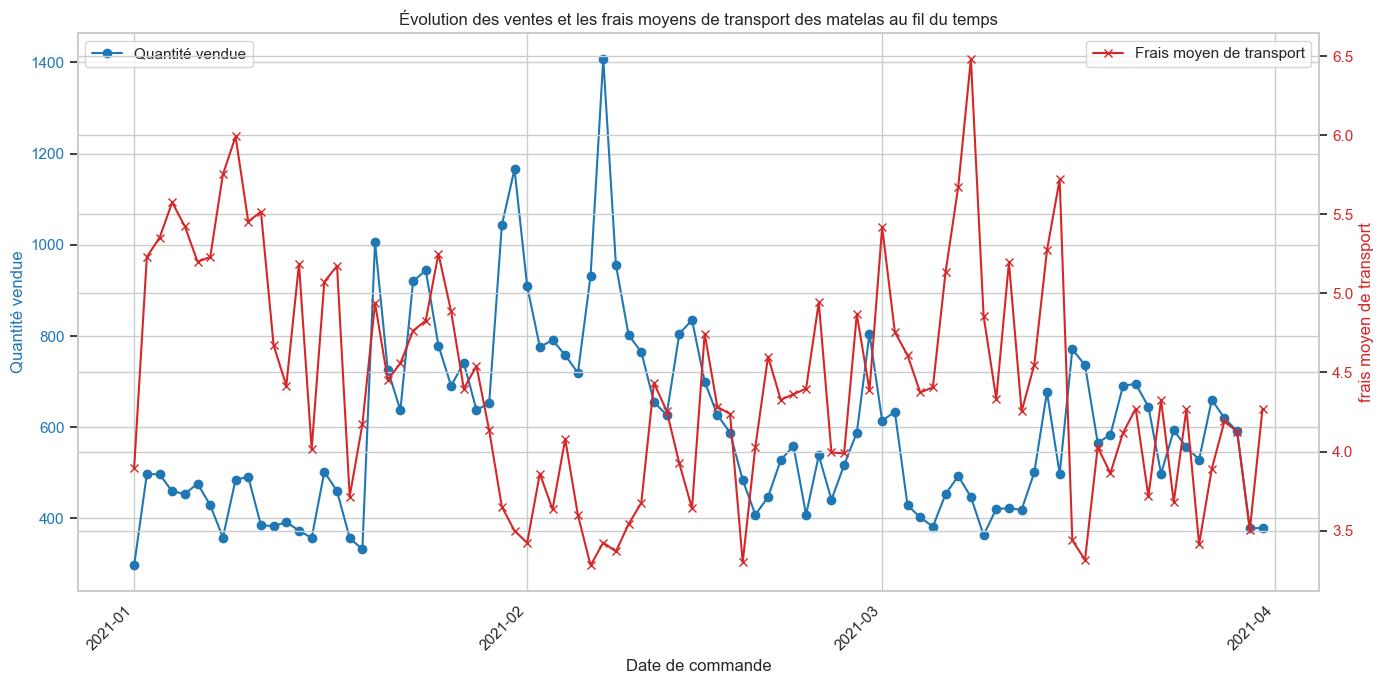

In [70]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date de commande')
ax1.set_ylabel('Quantité vendue', color=color)
ax1.plot(ventes_par_date['Date de commande'], ventes_par_date['Quantité'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Quantité vendue'], loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('frais moyen de transport', color=color)
ax2.plot(prix_moyen_par_date['Date de commande'], prix_moyen_par_date['Prix transport'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Frais moyen de transport'], loc='upper right')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

plt.title('Évolution des ventes et les frais moyens de transport des matelas au fil du temps')
fig.tight_layout()
plt.show()


**Objeticf**:
- comprendre le lien relatives aux ventes de produits et aux coûts logistiques associés. Autrement dit si une augmentation des frais de transport coïncide avec une diminution des ventes. 

**Interpretation**:

- Quantité vendue (en bleu) : Cette courbe montre des pics et des creux irréguliers, indiquant que la quantité de matelas vendus varie de manière significative au cours du temps. Il n'y a pas de tendance claire vers une augmentation ou une diminution sur la période représentée, mais plutôt des fluctuations.

- Frais moyens de transport (en rouge) : Les frais de transport semblent également fluctuer, bien que leur amplitude de variation soit moindre que celle de la quantité vendue. On observe certains pics qui correspondent à des augmentations temporaires des frais de transport. Il y a des moments où les frais moyens de transport augmentent alors que la quantité vendue diminue et vice versa, mais sans relation directe clairement observable sur ce graphique.

- Globalement, il ne semble pas y avoir une corrélation évidente entre les quantités vendues et les frais moyens de transport, ce qui suggère que d'autres facteurs peuvent influencer ces deux variables


# Quelques élements de réponses aux questions ouvertes

# Analyse de Corrélation

Pour déterminer la relation entre les ventes de matelas et d'autres variables comme le montant des commandes,le prix de transport et les délais de transport annoncé, nous allons utiliser la corrélation de Pearson.

<Axes: >

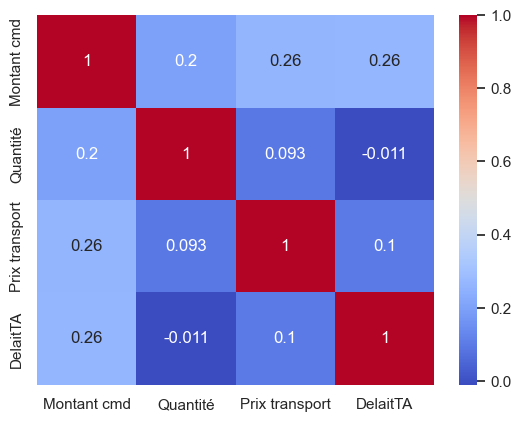

In [71]:
# Calculer la matrice de corrélation
Matx = BM[['Libellé produit', 'Vendeur', 'Univers', 'Nature',
       'Date de commande', 'Montant cmd', 'Quantité', 'Prix transport',
       'DelaitTA']].corr()

# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(Matx , annot=True, cmap="coolwarm")

**Interpretation**:

-  1 indique une corrélation positive parfaite (lorsqu'une variable augmente, l'autre aussi).
- -1 indique une corrélation négative parfaite (lorsqu'une variable augmente, l'autre diminue).
-  0 indique aucune corrélation (les variables ne sont pas liées l'une à l'autre).

**Analyse descriptive**:
- La quantité de produits vendus et le montant total des ventes: Il existe une faible corrélation positive (soit 0.2) entre la quantité de produits vendus et le montant total des ventes. Cela signifie que lorsque la quantité vendue augmente, le montant total des ventes a tendance à augmenter également, mais la relation n'est pas très forte.

- Le Prix du transport & le montant des ventes: Il existe aussi une corrélation positive faible (soit 0.26) ce qui suggère que lorsque le prix du transport augmente, il en va de même pour le montant des ventes. Cela pourrait indiquer que les produits avec un coût de transport plus élevé sont vendus plus chers ou en plus grandes quantités.

- Le délai de transport & le montant total des ventes: Il y a également une faible corrélation positive entre le délai avant le traitement des commandes et le montant total des ventes. Cela pourrait signifier que des commandes avec des délais plus longs pourraient être associées à des ventes plus importantes, ce qui peut arriver si des commandes plus volumineuses ou plus complexes prennent plus de temps à traiter.

- Le prix du transport et la quantité vendue : Il y a une très faible corrélation positive entre le prix du transport et la quantité vendue. Cela indique que ces deux variables ne sont pas fortement liées.

- Delai de Transport et Quantité (-0.011), Delai de transport  et Prix transport (0.1) : Ces relations montrent soit une très faible corrélation négative ou une très faible corrélation positive, ce qui suggère qu'il n'y a pratiquement aucune relation directe entre le délai de traitement des commandes et la quantité vendue ou le prix du transport.


**En conclusion**:

- Cette matrice de correation nous a aidé à vérifier si certaines choses dans les affaires ont tendance à se produire ensemble, même si on ne peut pas dire avec certitude que l'une cause l'autre. Il nous à donné quelques indices sur ce qui pourrait être important, mais nous devrions creuser plus profondément pour comprendre toute l'histoire ( d'oû nos modele de regression) 

# Analyse des saisonnalité

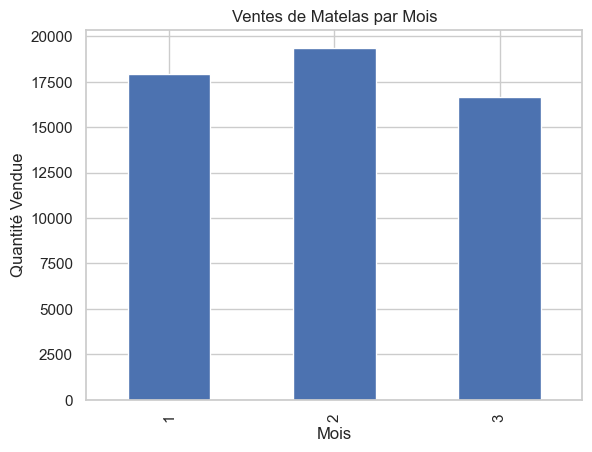

In [73]:
# Création d'un champ 'Mois' à partir de la date de commande
BM['Mois'] = BM['Date de commande'].dt.month

# Groupement des données par mois et somme des ventes
ventes_mensuelles = BM.groupby('Mois')['Quantité'].sum()

# Visualisation
ventes_mensuelles.plot(kind='bar')
plt.title('Ventes de Matelas par Mois')
plt.xlabel('Mois')
plt.ylabel('Quantité Vendue')
plt.show()


Ce graphique en barres montre les ventes de matelas pour chaque mois, ce qui peut aider à identifier des pics de ventes à certaines périodes de l'année. Objectivement, Fevriver constitue les Pic en termes de ventes de Matelas sur les bases données presentées. 

# MODELLES SUPERVISEES

✅ Régression Linéaire (OLS)

✅ GLM avec Poisson et Gamma

✅ Arbre de décision, Random Forest, XGBoost

✅ Code pour entraîner, tester et comparer les modèles

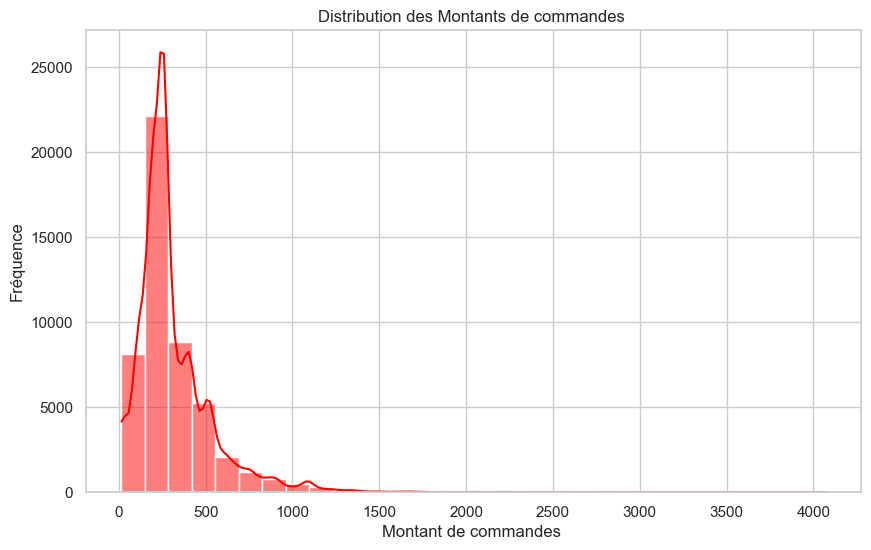

In [95]:
# Histogramme du montant des sinistres
plt.figure(figsize=(10, 6))
sns.histplot(BM['Montant_cmd'], bins=30, kde=True, color='red')
plt.title('Distribution des Montants de commandes ')
plt.xlabel('Montant de commandes ')
plt.ylabel('Fréquence')
plt.show()

Ne suit pas une loi normal, alors GLM avec loi Gamme reste le meileurs modèle. 

# Régression Linéaire

In [78]:

####Régression Linéaire

import statsmodels.api as sm
X = BM[['Quantité', 'Prix transport', 'DelaitTA']]
X = sm.add_constant(X)  # Ajout d'une constante

y = BM['Montant cmd']
modele_regression = sm.OLS(y, X).fit()
print(modele_regression.summary())



                            OLS Regression Results                            
Dep. Variable:            Montant cmd   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3080.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:59:19   Log-Likelihood:            -3.3362e+05
No. Observations:               49489   AIC:                         6.673e+05
Df Residuals:                   49485   BIC:                         6.673e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            104.0423      3.041     34.

 **Interpretation du modele**: 
 
- La constante (const) : C'est un point de départ fixe pour les prédictions de vente qui est ici d'environ 104.04


- Quantité : Pour chaque matelas supplémentaire vendu, les ventes augmentent d'environ 104.22. C'est un effet assez significatif, ce qui signifie que la quantité vendue est fortement liée aux revenus générés par les ventes de matelas.


- Prix transport : Chaque unité supplémentaire dans le coût de transport est associée à une augmentation d'environ 5.40 dans le montant des ventes. Cela peut paraître contre-intuitif car on pourrait s'attendre à ce que des coûts plus élevés réduisent les profits, mais cela pourrait suggérer que les matelas avec des frais de transport plus élevés sont vendus à des prix plus élevés ou que les frais sont passés aux clients.


- Delai de transport annoncé : Le délai de traitement semble aussi influencer positivement les ventes. Un délai plus long est associé à une augmentation d'environ 6.92 dans les ventes. Cela pourrait suggérer que des commandes plus importantes prennent plus de temps à être traitées, ou que les clients sont prêts à payer plus pour des produits nécessitant un délai plus long.


- Il faut noter que notre modèle explique seulement environ 15.7% de la variabilité du montant total des ventes pour les matelas. Bien que cela montre que nos variables ont une certaine influence, il y a beaucoup de variation dans les ventes de matelas que le modèle ne capte pas. En d'autres termes, il reste encore beaucoup à expliquer en termes de ce qui affecte les ventes de matelas.


- Les quantités vendues, les prix de transport, et le Delai de transport annoncé (DelaiTA) sont tous des facteurs statistiquement significatifs pour prédire les ventes de matelas.
 

# Modèle Poisson

In [85]:
# Renommer les colonnes pour éviter les erreurs avec les espaces
BM = BM.rename(columns={'Montant cmd': 'Montant_cmd', 'Prix transport': 'Prix_transport'})

# Modèle Poisson
modele_poisson = smf.glm("Montant_cmd ~ Quantité + Prix_transport + DelaitTA", 
                         data=BM, family=sm.families.Poisson()).fit()
print(modele_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Montant_cmd   No. Observations:                49489
Model:                            GLM   Df Residuals:                    49485
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9647e+06
Date:                Sat, 01 Mar 2025   Deviance:                   5.5659e+06
Time:                        03:09:16   Pearson chi2:                 6.31e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.3121      0.001   9251.

# Modèle Gamma

In [86]:
# Modèle Gamma
modele_gamma = smf.glm("Montant_cmd ~ Quantité + Prix_transport + DelaitTA", 
                        data=BM, family=sm.families.Gamma()).fit()
print(modele_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Montant_cmd   No. Observations:                49489
Model:                            GLM   Df Residuals:                    49485
Model Family:                   Gamma   Df Model:                            3
Link Function:          inverse_power   Scale:                         0.42369
Method:                          IRLS   Log-Likelihood:            -3.2994e+05
Date:                Sat, 01 Mar 2025   Deviance:                       26519.
Time:                        03:10:07   Pearson chi2:                 2.10e+04
No. Iterations:                     9   Pseudo R-squ. (CS):            -0.1474
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0045    1.4e-05    318.

# Arbre de Décision

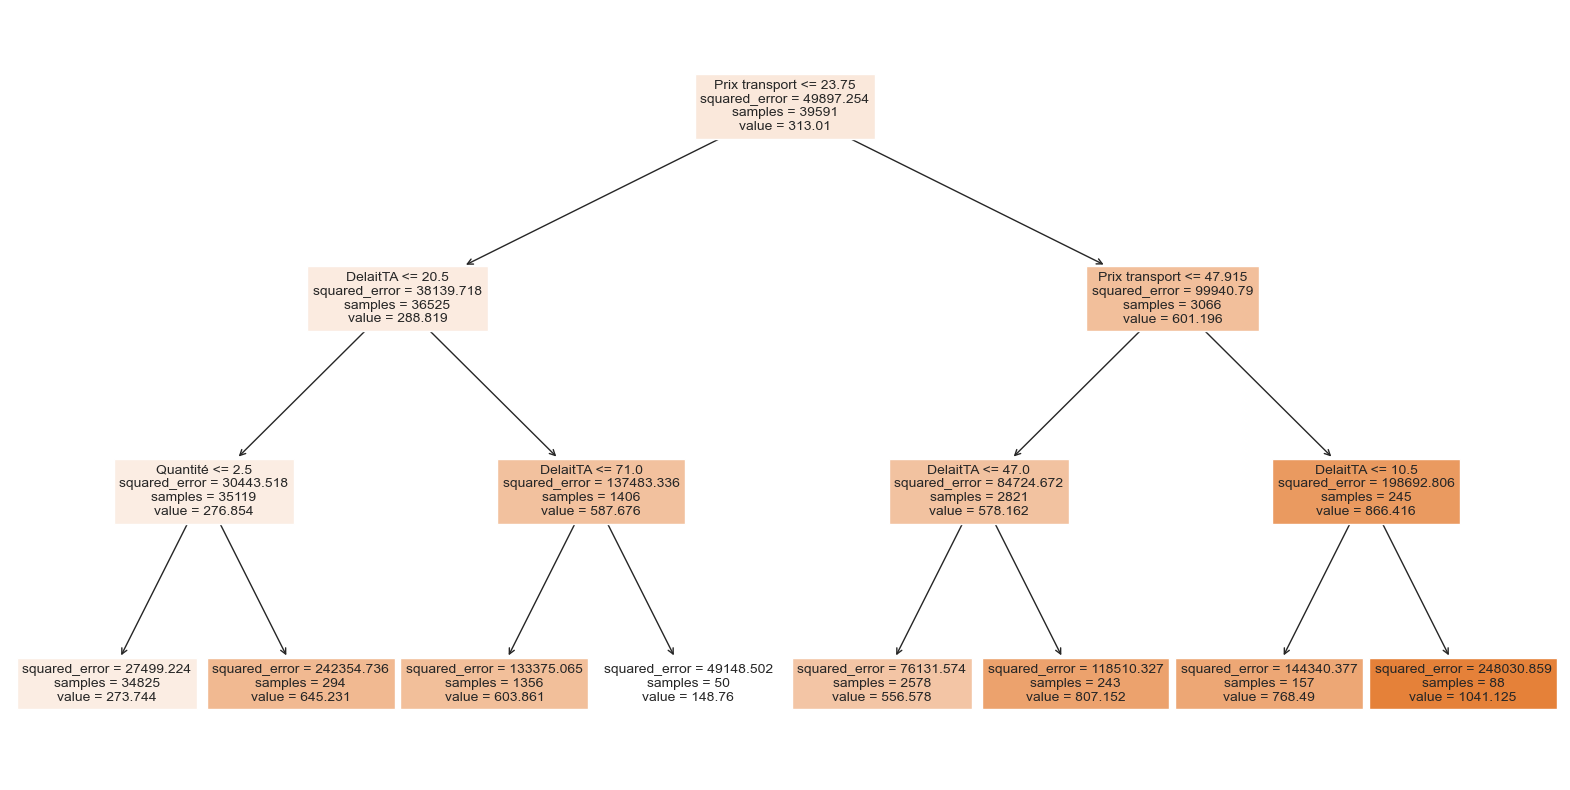

In [93]:
#### Arbre de Décision

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Entraînement du modèle
arbre = DecisionTreeRegressor(max_depth=3)
arbre.fit(X_train, y_train)

# Prédiction
y_pred = arbre.predict(X_test)

# Visualisation de l'arbre
plt.figure(figsize=(20,10))
tree.plot_tree(arbre, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

# Random Forest et XGBoost

In [88]:
#### Random Forest et XGBoost

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score

# Modèles
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100)
}


In [89]:

# Évaluation des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}")


Random Forest - MAE: 116.62396985767694
XGBoost - MAE: 116.90365797270425


In [90]:
#### 🔹 Sélection du Meilleur Modèle

from sklearn.model_selection import cross_val_score

best_model = None
best_score = float('inf')

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    score = -scores.mean()
    print(f"{name} - MAE Cross-Validation: {score}")
    if score < best_score:
        best_score = score
        best_model = model

print(f"Le meilleur modèle est : {best_model}")

Random Forest - MAE Cross-Validation: 118.6100041055059
XGBoost - MAE Cross-Validation: 118.84017179977869
Le meilleur modèle est : RandomForestRegressor()


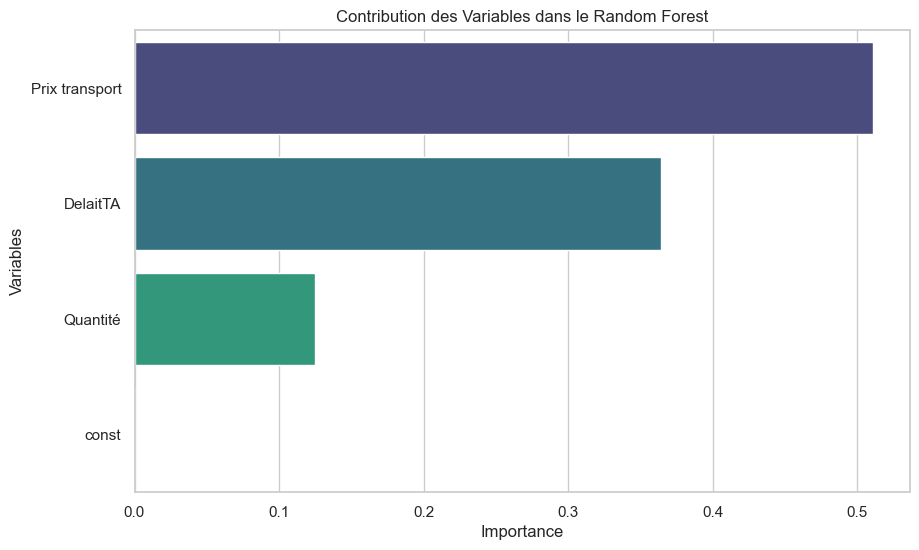

In [96]:
# Entraînement du modèle Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Récupération des importances des variables
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Affichage sous forme de graphique
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importances, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Contribution des Variables dans le Random Forest")
plt.show()

In [83]:
#### Modèles de Machine Learning (Arbre de décision, Random Forest, XGBoost)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100)
}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}")
    


Decision Tree - MAE: 116.93136291229776
Random Forest - MAE: 116.64272823676912
XGBoost - MAE: 116.90365797270425


In [98]:
from sklearn.metrics import mean_absolute_error, r2_score

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, R²: {r2}")

Random Forest - MAE: 116.58822565411745, R²: 0.3492823765422479
XGBoost - MAE: 116.90365797270425, R²: 0.3407991895911344
